In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [9]:
data.drop(["Country", "Region", "Happiness Rank"], axis=1, inplace=True)

In [11]:
data.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [18]:
plt.figure(figsize=(20,5),facecolor='red')
plotnumber=1

<Figure size 2000x500 with 0 Axes>

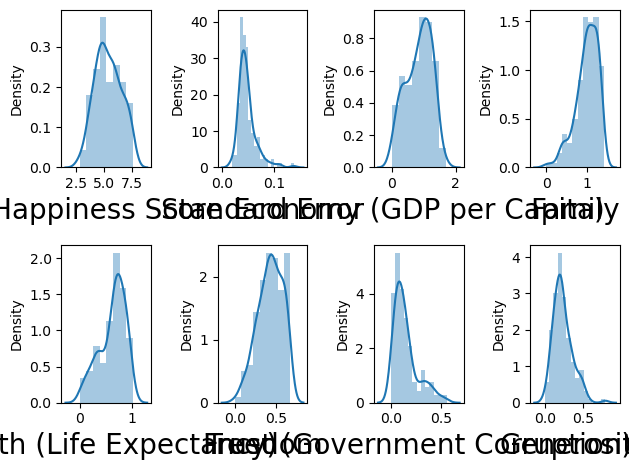

In [19]:
for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [21]:
y=data['Happiness Score']
x=data.drop(columns=['Happiness Score'])

In [22]:
plt.figure(figsize=(15,10), facecolor='yellow')
plotnumber=1

<Figure size 1500x1000 with 0 Axes>

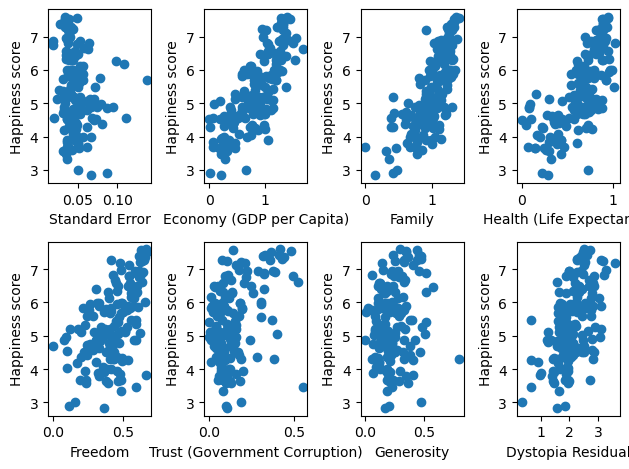

In [23]:
for column in x:
    if plotnumber<=8:
        ax=plt.subplot(2,4, plotnumber)
        plt.scatter(x[column], y)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Happiness score', fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [24]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)

In [26]:
x_train, x_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.25, random_state=112)

In [30]:
regression=LinearRegression()


In [31]:
regression.fit(x_train, y_train)

LinearRegression()

In [32]:
regression.score(x_train, y_train)

0.9999999464243313

In [33]:
regression.score(x_test, y_test)

0.9999999211459927

In [34]:
x_test[1]

array([-0.72050477,  0.30052226,  1.00916467,  0.43947621,  0.85227797,
       -0.93228971,  2.684474  ,  0.39955621])

In [35]:
y_pred=regression.predict(x_test)
y_pred

array([5.19239166, 6.45461409, 5.81252785, 3.67785498, 5.14034882,
       4.83919584, 6.86716168, 6.12277718, 3.34001154, 7.42687008,
       5.77035541, 4.55065971, 6.13020845, 7.27769801, 5.01309092,
       4.68073744, 4.41928633, 3.58686892, 5.8897399 , 5.28635039,
       5.42852205, 6.90130877, 4.27057953, 5.98373987, 2.9046914 ,
       4.25197206, 5.19228711, 4.57156465, 5.84756058, 6.485099  ,
       4.50723688, 4.97123852, 5.82411932, 6.94615455, 4.3500116 ,
       4.51232884, 3.93078741, 5.79052594, 6.29471345, 5.47699165])

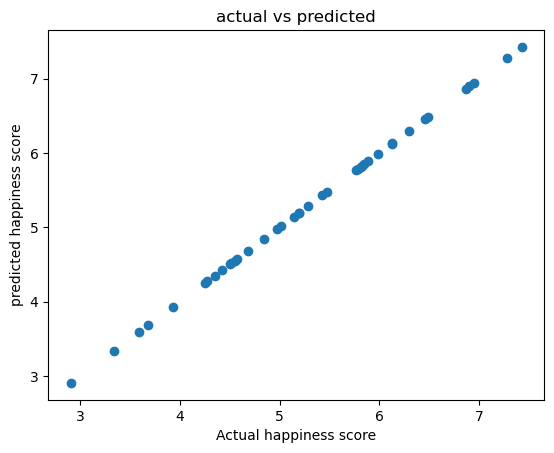

In [36]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual happiness score')
plt.ylabel('predicted happiness score')
plt.title('actual vs predicted')
plt.show()